# Exploratory Data Analysis and Visualization of Processed Molecular Data

The dataset was obtained from Wang, Y. *et al.* [1], consisting of 13,688 molecules stored as SMILES strings alongside their experimentally determined logP values. The data has been preprocessed in a separate script (`smiles_preprocessing.py`) and saved in the file `logP_processed_v01.csv`, where SMILES strings were converted into various molecular representations, and additional molecular properties such as molecular weights and Crippen logP values were calculated.

The aim of this notebook is to perform an exploratory data analysis on the preprocessed dataset to gain insights into its structure and distributions, as well as to visualize the molecular properties and their relationships.

---

## Objectives:
- Explore the distributions of experimentally determined logP values and other molecular properties (e.g., molecular weight, number of atoms).
- Analyze the relationship between experimentally determined logP values and properties like molecular weight and Crippen logP values.
- Visualize molecular property distributions and correlations using histograms, scatter plots, and other appropriate techniques.

---

[1] Wang, Y. et al. LogD7.4 prediction enhanced by transferring knowledge from chromatographic retention time, microscopic pKa, and logP. J. Cheminformatics 15, 76 (2023).


---

In [33]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

In [4]:
# turn off warnings
import warnings
warnings.filterwarnings('ignore')

---
## Load and Process Dataset

In [5]:
# load the processed logP data set
logP_df = pd.read_csv('../data/processed/logP_processed_v01.csv')

# get an overview of the dataset
logP_df.head()

,smiles,number_of_atoms,molecular_formula,molecular_weight,logP,logP_Crippen
0,BrC(Br)(Br)Br,5,CBr4,331.627,3.42,3.1773
1,BrC1C2CC3C(C2)C13,17,C7H9Br,173.053,3.11,2.0357
2,BrC1CC2CCC1C2,19,C7H11Br,175.069,3.54,2.5699
3,BrC1CCCCC1,18,C6H11Br,163.058,3.20,2.7140
4,BrC=C(Br)Br,6,C2HBr3,264.742,3.20,2.9700


In [6]:
# get stats
logP_df.describe()

,number_of_atoms,molecular_weight,logP,logP_Crippen
count,13688.000000,13688.000000,13688.000000,13688.000000
mean,32.279150,258.886424,2.126264,2.136962
std,15.716753,112.596662,1.867572,1.677167
min,5.000000,66.063000,-4.650000,-8.861700
25%,22.000000,179.175000,0.890000,1.061275
50%,29.000000,240.353000,2.030000,2.021400
75%,39.000000,315.377000,3.250000,3.118420
max,196.000000,1202.635000,9.960000,15.879200


In [7]:
# check for missing values
logP_df.isnull().sum()

smiles               0
number_of_atoms      0
molecular_formula    0
molecular_weight     0
logP                 0
logP_Crippen         0
dtype: int64

In [12]:
# the "raw SMILES string" were converted into canonical SMILES using rdkit. Now two identical molecules should be represented by the same SMILE --> check for any duplicate molecules (SMILES)
duplicate_smiles = logP_df[logP_df['smiles'].duplicated()]['smiles'].values

len(duplicate_smiles)   # no duplicated smiles!

0

---
## Data Visualization and Exploration

In [14]:
# extract smiles
smiles = logP_df['smiles']

# extract molecular weights
mol_weights = logP_df['molecular_weight']

# extract number of atoms
num_atoms = logP_df['number_of_atoms']

# extract experimentally determined logP values
logP = logP_df['logP']

# extract calc. logP values using Crippen's method
logP_crippen = logP_df['logP_Crippen']

In [17]:
# get stats for molecular weights
mol_weights_mean = np.mean(mol_weights)
mol_weights_std = np.std(mol_weights)
mol_weights_min = np.min(mol_weights)
mol_weights_max = np.max(mol_weights)

print(f'Molecular Weights: Mean = {mol_weights_mean:.2f}, Std = {mol_weights_std:.2f}, Min = {mol_weights_min:.2f}, Max = {mol_weights_max:.2f}')

# get stats for number of atoms
num_atoms_mean = np.mean(num_atoms)
num_atoms_std = np.std(num_atoms)
num_atoms_min = np.min(num_atoms)
num_atoms_max = np.max(num_atoms)

print(f'Number of Atoms: Mean = {num_atoms_mean:.2f}, Std = {num_atoms_std:.2f}, Min = {num_atoms_min:.2f}, Max = {num_atoms_max:.2f}')

# get stats for experimentally determined logP values
logP_exp_mean = np.mean(logP)
logP_exp_std = np.std(logP)
logP_exp_min = np.min(logP)
logP_exp_max = np.max(logP)

print(f'Experimentally Determined logP Values: Mean = {logP_exp_mean:.2f}, Std = {logP_exp_std:.2f}, Min = {logP_exp_min:.2f}, Max = {logP_exp_max:.2f}')

# get stats for calculated logP values using Crippen's method
logP_crippen_mean = np.mean(logP_crippen)
logP_crippen_std = np.std(logP_crippen)
logP_crippen_min = np.min(logP_crippen)
logP_crippen_max = np.max(logP_crippen)

print(f'Calculated logP Values using Crippen\'s Method: Mean = {logP_crippen_mean:.2f}, Std = {logP_crippen_std:.2f}, Min = {logP_crippen_min:.2f}, Max = {logP_crippen_max:.2f}')

Molecular Weights: Mean = 258.89, Std = 112.59, Min = 66.06, Max = 1202.63
Number of Atoms: Mean = 32.28, Std = 15.72, Min = 5.00, Max = 196.00
Experimentally Determined logP Values: Mean = 2.13, Std = 1.87, Min = -4.65, Max = 9.96
Calculated logP Values using Crippen's Method: Mean = 2.14, Std = 1.68, Min = -8.86, Max = 15.88


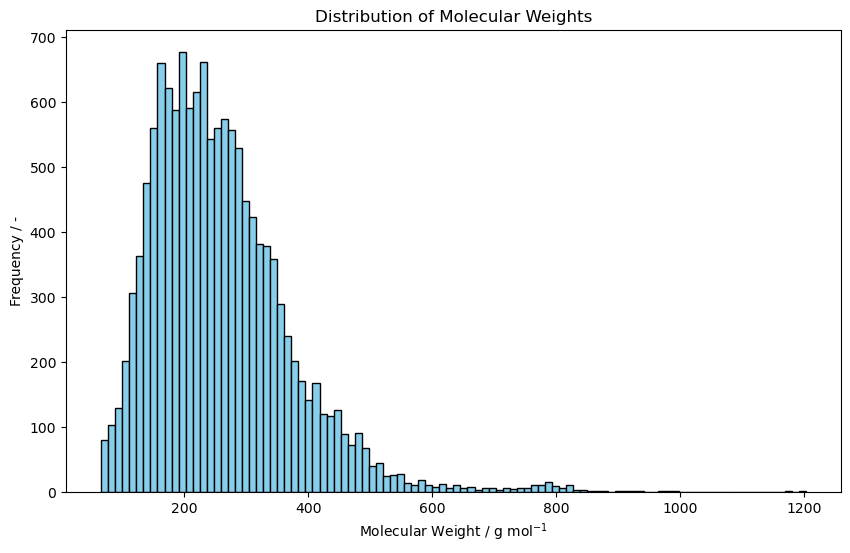

In [23]:
# plot the distribution of molecular weights
plt.figure(figsize=(10, 6))
plt.hist(mol_weights, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Molecular Weights')
plt.xlabel('Molecular Weight / g mol$^{-1}$')
plt.ylabel('Frequency / -')
plt.show()

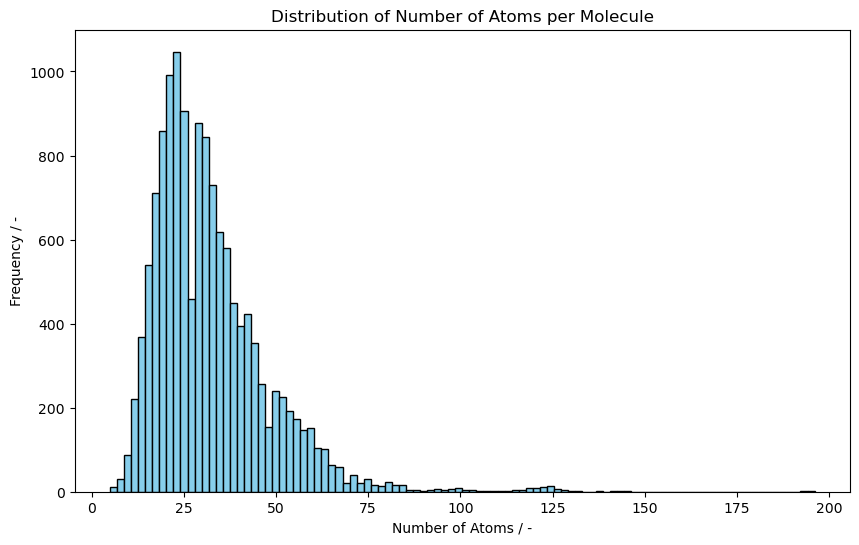

In [24]:
# plot the distribution of number of atoms per molecule
plt.figure(figsize=(10, 6))
plt.hist(num_atoms, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Atoms per Molecule')
plt.xlabel('Number of Atoms / -')
plt.ylabel('Frequency / -')
plt.show()

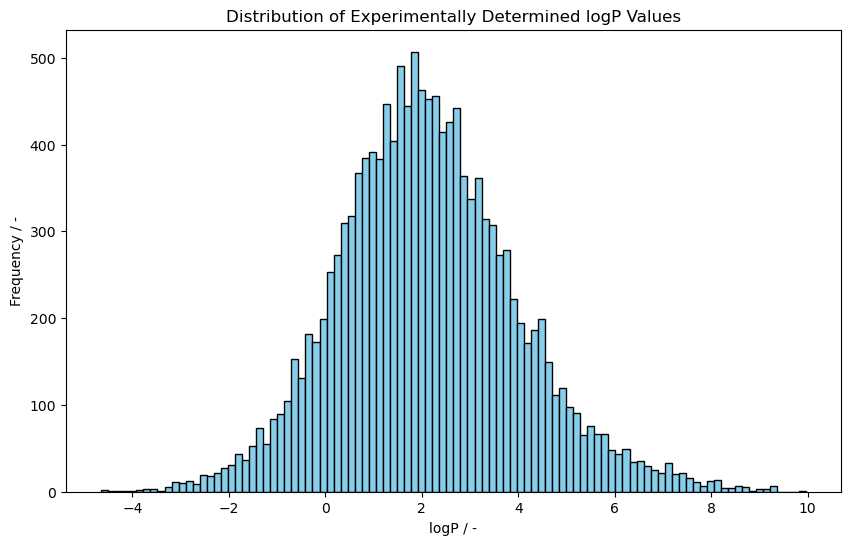

In [26]:
# plot the distribution of experimentally determined logP values
plt.figure(figsize=(10, 6))
plt.hist(logP, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Experimentally Determined logP Values')
plt.xlabel('logP / -')
plt.ylabel('Frequency / -')
plt.show()

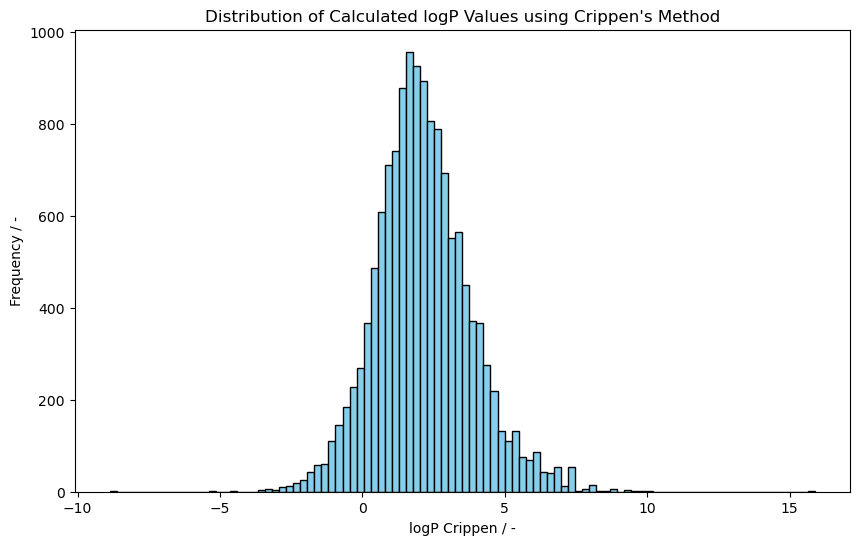

In [27]:
# plot the distribution of calculated logP values using Crippen's method
plt.figure(figsize=(10, 6))
plt.hist(logP_crippen, bins=100, color='skyblue', edgecolor='black')
plt.title("Distribution of Calculated logP Values using Crippen's Method")
plt.xlabel('logP Crippen / -')
plt.ylabel('Frequency / -')
plt.show()

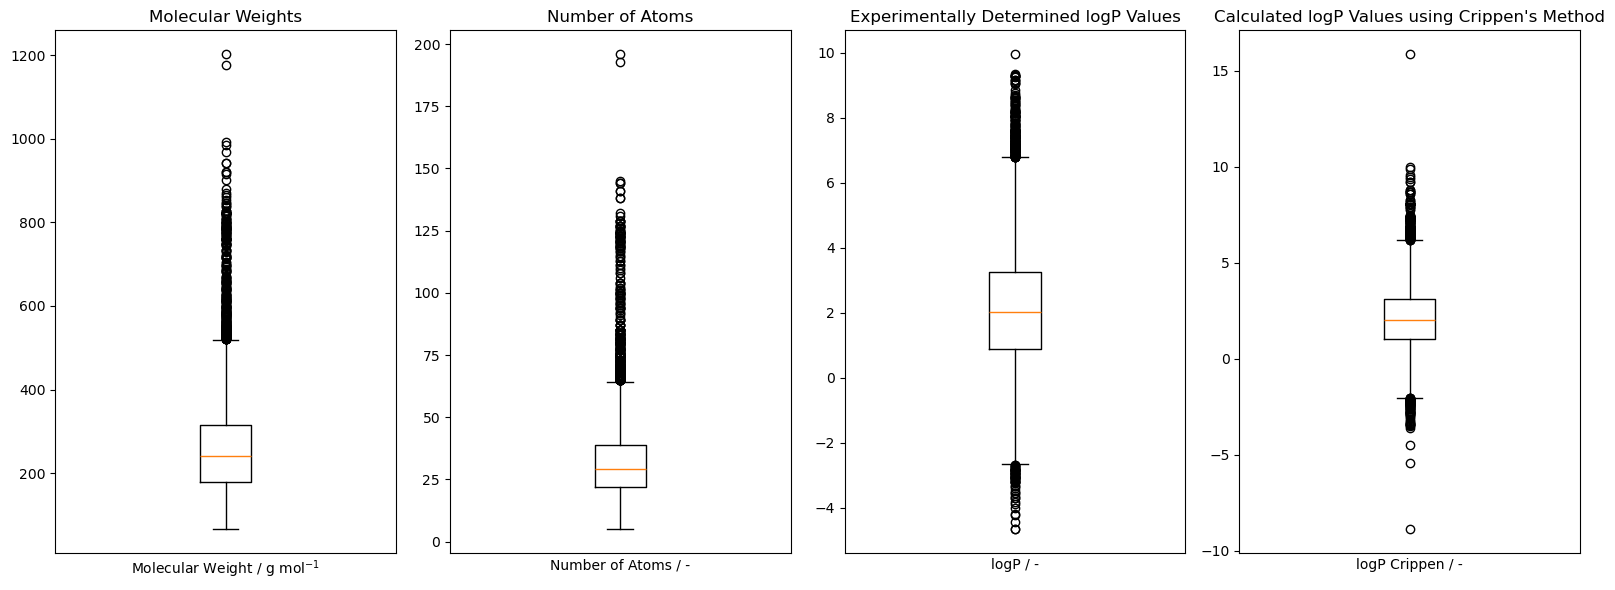

In [29]:
# boxplots for molecular weights, number of atoms per molecule, experimentally determined logP values, and calculated logP values using Crippen's method
plt.figure(figsize=(16, 6))
plt.subplot(1, 4, 1)
plt.boxplot(mol_weights)
plt.title('Molecular Weights')
plt.xlabel('Molecular Weight / g mol$^{-1}$')
plt.xticks([])

plt.subplot(1, 4, 2)
plt.boxplot(num_atoms)
plt.title('Number of Atoms')
plt.xlabel('Number of Atoms / -')
plt.xticks([])

plt.subplot(1, 4, 3)
plt.boxplot(logP)
plt.title('Experimentally Determined logP Values')
plt.xlabel('logP / -')
plt.xticks([])

plt.subplot(1, 4, 4)
plt.boxplot(logP_crippen)
plt.title("Calculated logP Values using Crippen's Method")
plt.xlabel('logP Crippen / -')
plt.xticks([])

plt.tight_layout()
plt.show()

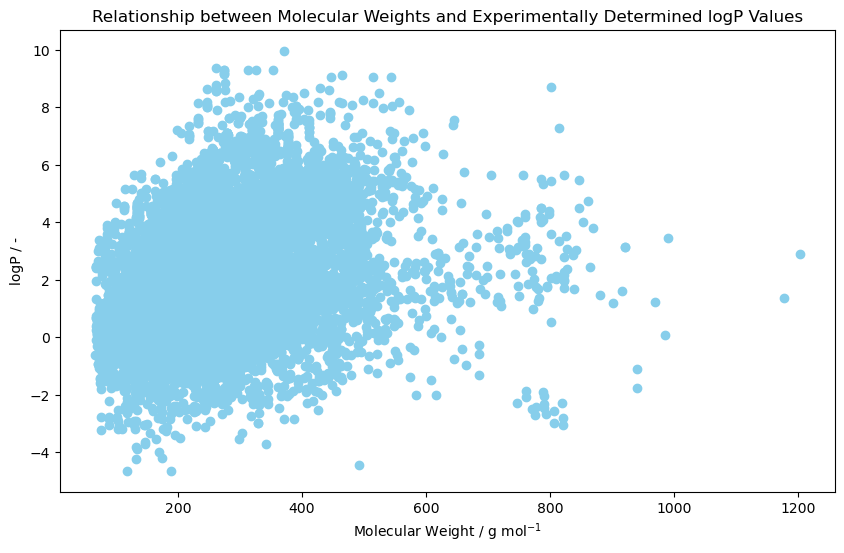

In [30]:
# plot the relationship between experimentally determined logP values and molecular weights
plt.figure(figsize=(10, 6))
plt.scatter(mol_weights, logP, color='skyblue')
plt.title('Relationship between Molecular Weights and Experimentally Determined logP Values')
plt.xlabel('Molecular Weight / g mol$^{-1}$')
plt.ylabel('logP / -')
plt.show()

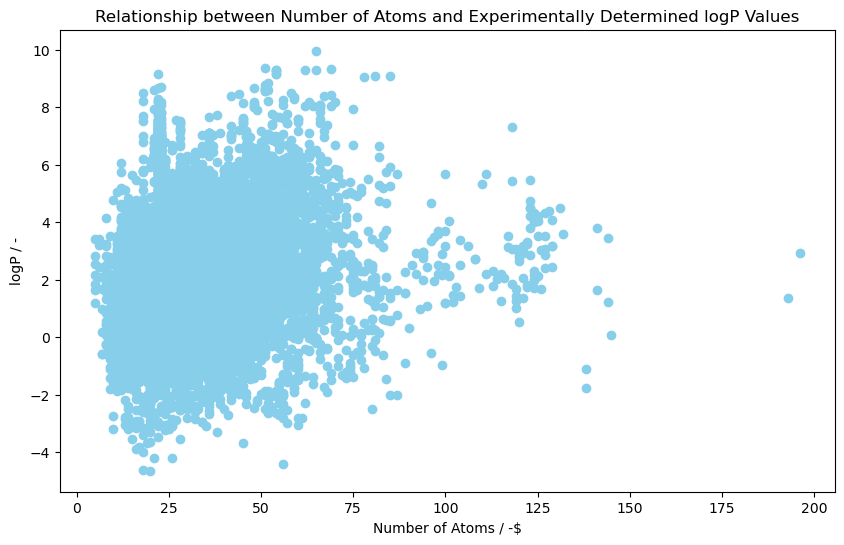

In [31]:
# plot the relationship between experimentally determined logP values and number of atoms per molecule
plt.figure(figsize=(10, 6))
plt.scatter(num_atoms, logP, color='skyblue')
plt.title('Relationship between Number of Atoms and Experimentally Determined logP Values')
plt.xlabel('Number of Atoms / -$')
plt.ylabel('logP / -')
plt.show()

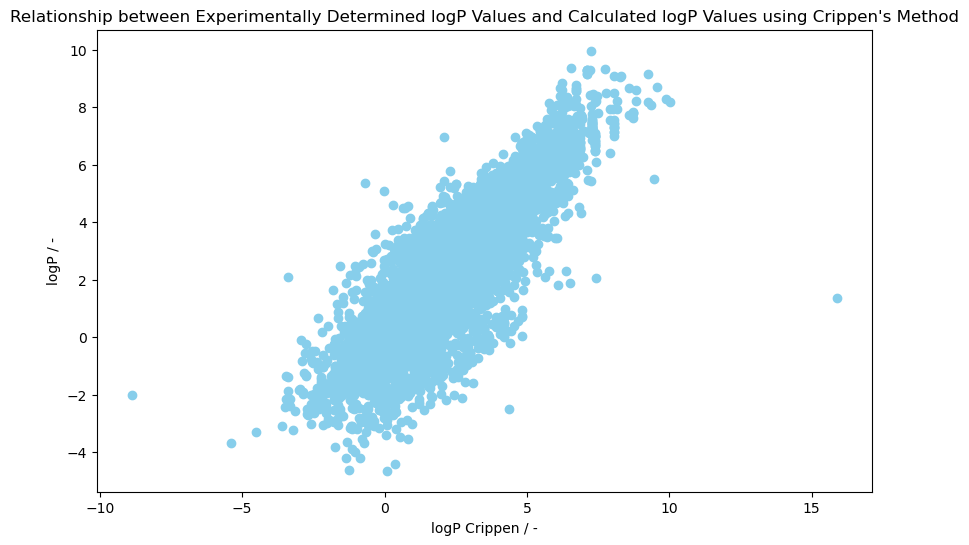

In [32]:
# plot the relationship between experimentally determined logP values and calculated logP values using Crippen's method
plt.figure(figsize=(10, 6))
plt.scatter(logP_crippen, logP, color='skyblue')
plt.title("Relationship between Experimentally Determined logP Values and Calculated logP Values using Crippen's Method")
plt.xlabel('logP Crippen / -')
plt.ylabel('logP / -')
plt.show()

---
## Visualize some of the molecules

In [37]:
# convert smiles into mol-objects
mol = [Chem.MolFromSmiles(smi) for smi in smiles]

# convert mol-objects into RGB images
molecular_images = [Draw.MolToImage(mol_i, (256, 256)) for mol_i in mol]

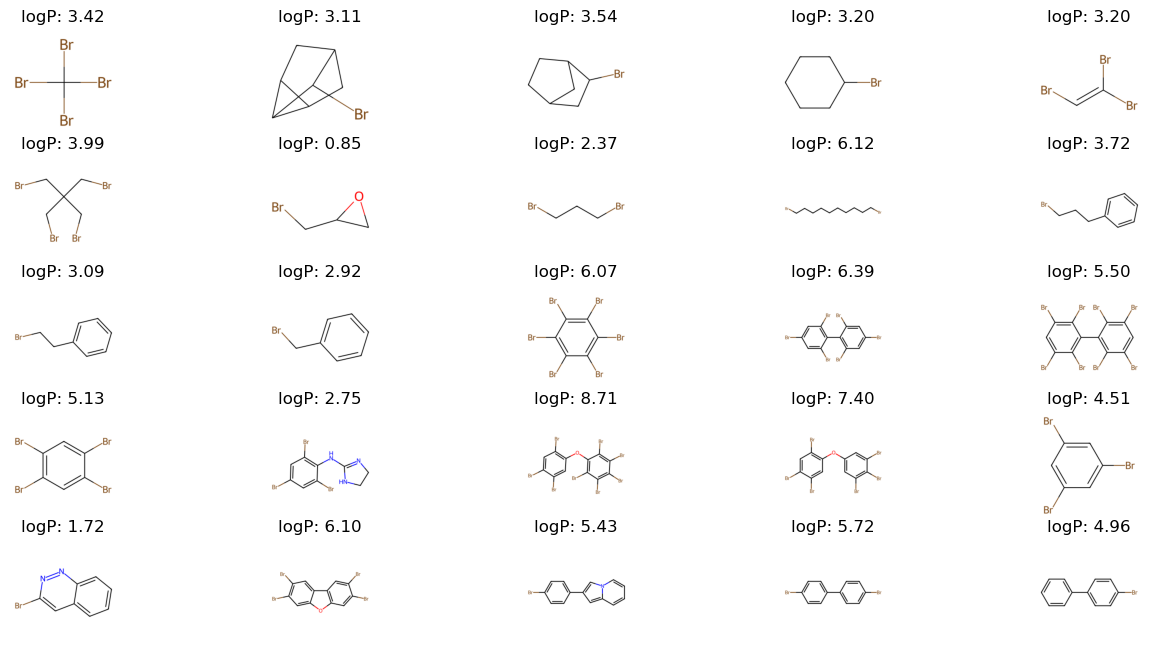

In [42]:
# visualize some of the molecules as RGB images
plt.figure(figsize=(16, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(molecular_images[i])
    plt.title(f'logP: {logP[i]:.2f}')
    plt.axis('off')